In [1]:
file_name = 'results.csv' # name of result file 
file_path = '' # path to the result file

In [20]:
#read csv file to extract data
import pandas as pd
import numpy as np
import io

df = None
try:
  from google.colab import files
  # colab
  uploaded = files.upload()
  df = pd.read_csv(io.StringIO(uploaded[file_name].decode('utf-8')), header = None)
except ImportError:
  # not colab
  import os
  df = pd.read_csv(os.path.join(file_path, file_name), header = None) 

count_row = df.shape[0]  # gives number of row count
count_col = df.shape[1]  # gives number of col count

sizes = df[0].unique() # buffer sizes used for the analysis

iterations = int(count_row/len(sizes)) # total experiments' repetitions 

len(sizes), iterations, count_row

Saving results.csv to results (1).csv


(54, 100, 5400)

In [21]:
# extract all runs seperately
all = []
pre = 0
for i in range(1, count_row):
  if (i+1) % len(sizes) == 0:
    l = df.iloc[pre: i+1]
    pre = i+1
    all.append(l)


print("In total there are",iterations, "runs")

In total there are 100 runs


In [22]:
# prep data for plotting
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

all_data = []
q1_data = []
q2_data = []
q3_data = []
h1_data = []

# extract each size results
data_per_size = {}

for i in range(0, iterations):
  l = list(all[i][1])
  l_size = len(l)
  all_data.append([x for x in l])
  q1_data.append([x for x in l[0:(int)(l_size/4)]])
  q2_data.append([x for x in l[(int)(l_size/4):(int)(l_size/2)]])
  q3_data.append([x for x in l[(int)(l_size/2):(int)(3*l_size/4)]])
  h1_data.append([x for x in l[0:(int)(l_size/2)]])

  # extracting timings for each size
  for j in range (0, len(l)):
    if j not in data_per_size:
      data_per_size[j] = []
    t = data_per_size[j]
    t.append(l[j])
    data_per_size[j] = t



print("q1_data ('{0}' items)".format(len(q1_data)*len(q1_data[0])))
print("h1_data ('{0}' items)".format(len(h1_data)*len(h1_data[0])))
print("all_data ('{0}' items)".format(len(all_data)*len(all_data[0])))
print("data_per_size ('{0}' sizes) has'{1}' instances".format(len(data_per_size), (len(data_per_size[0]))))

q1_data ('1300' items)
h1_data ('2700' items)
all_data ('5400' items)
data_per_size ('54' sizes) has'100' instances


In [23]:
def plot_heatmap(x, y, vals):
  fig, ax = plt.subplots(figsize=(100,80))

  im = ax.imshow(vals, cmap='hot')

  ax.set_xticks(np.arange(len(x)))
  ax.set_yticks(np.arange(len(y)))

  ax.set_xticklabels(x)
  ax.set_yticklabels(y)

# Rotate the tick labels and set their alignment.
  plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
  for i in range(len(y)):
      for j in range(len(x)):
    
          text = ax.text(j, i, vals[i, j],
                        ha="center", va="center", color="w")

  fig.tight_layout()
  plt.show()


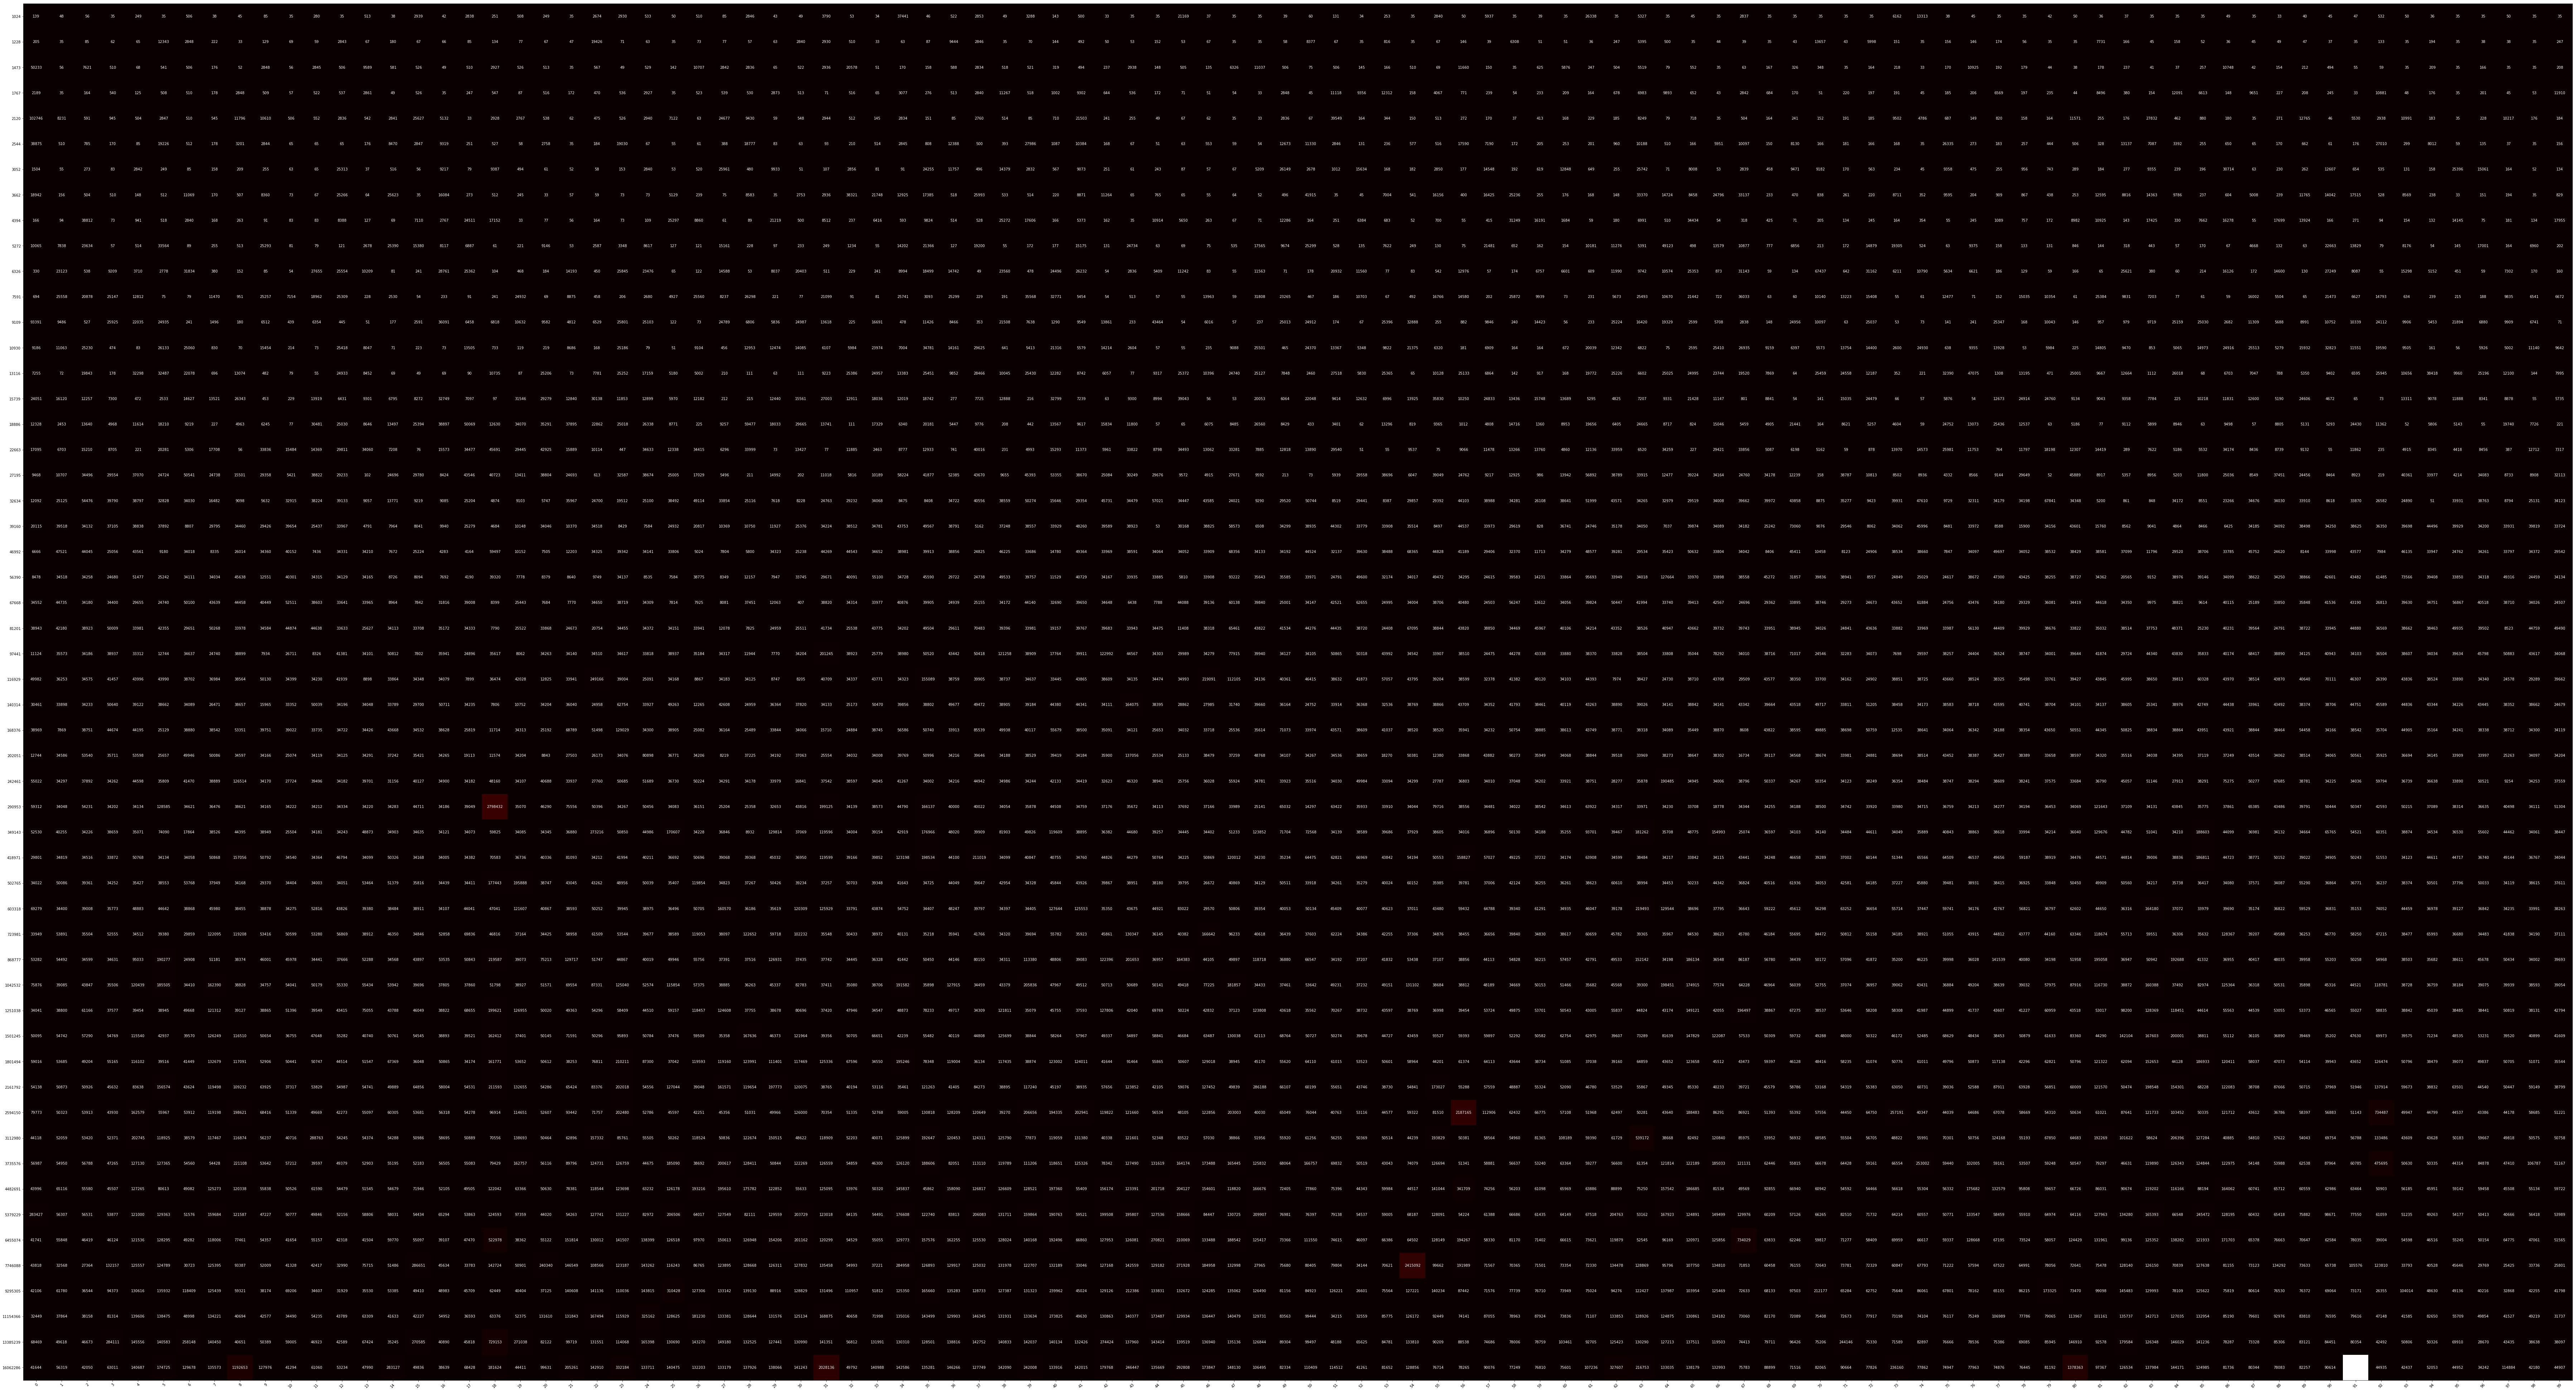

In [8]:
# for all data points 
plot_heatmap(range(0, iterations), sizes, np.array(all_data).T)



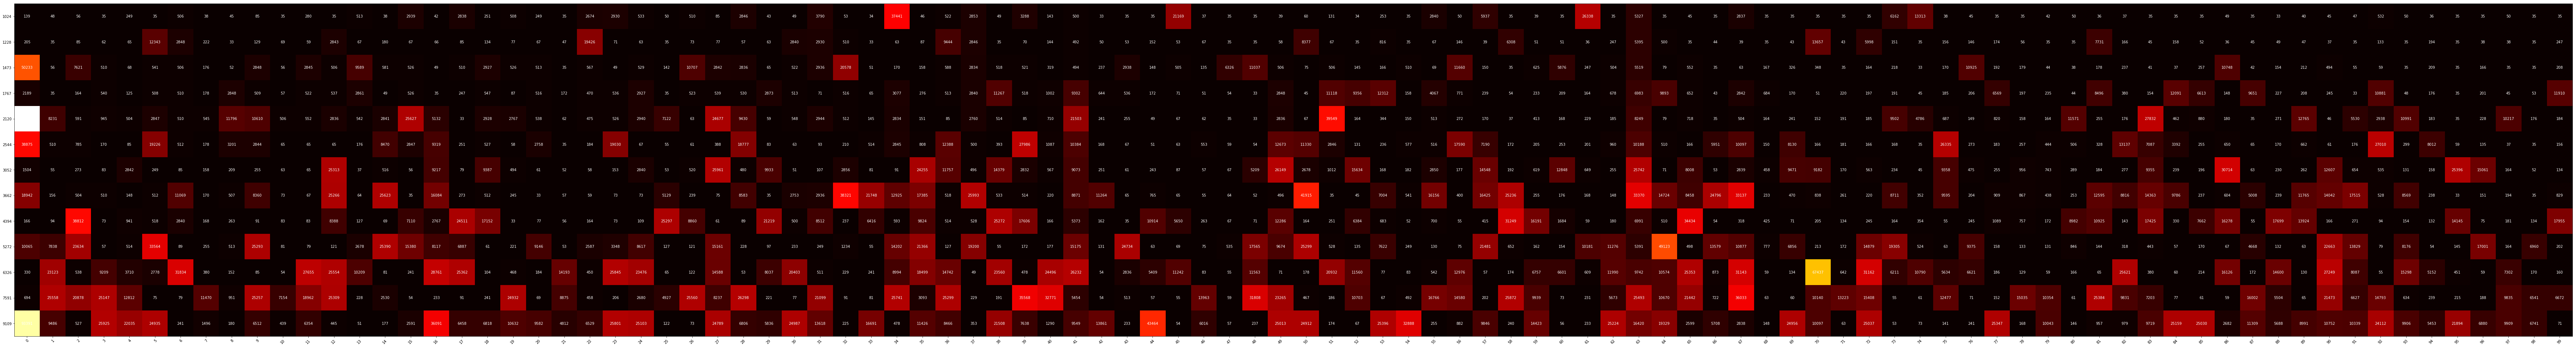

In [9]:
# for the first quarter of data points to analyze small size caches 
plot_heatmap(range(0, iterations), sizes[0:(int) (len(sizes)/4)], np.array(q1_data).T)

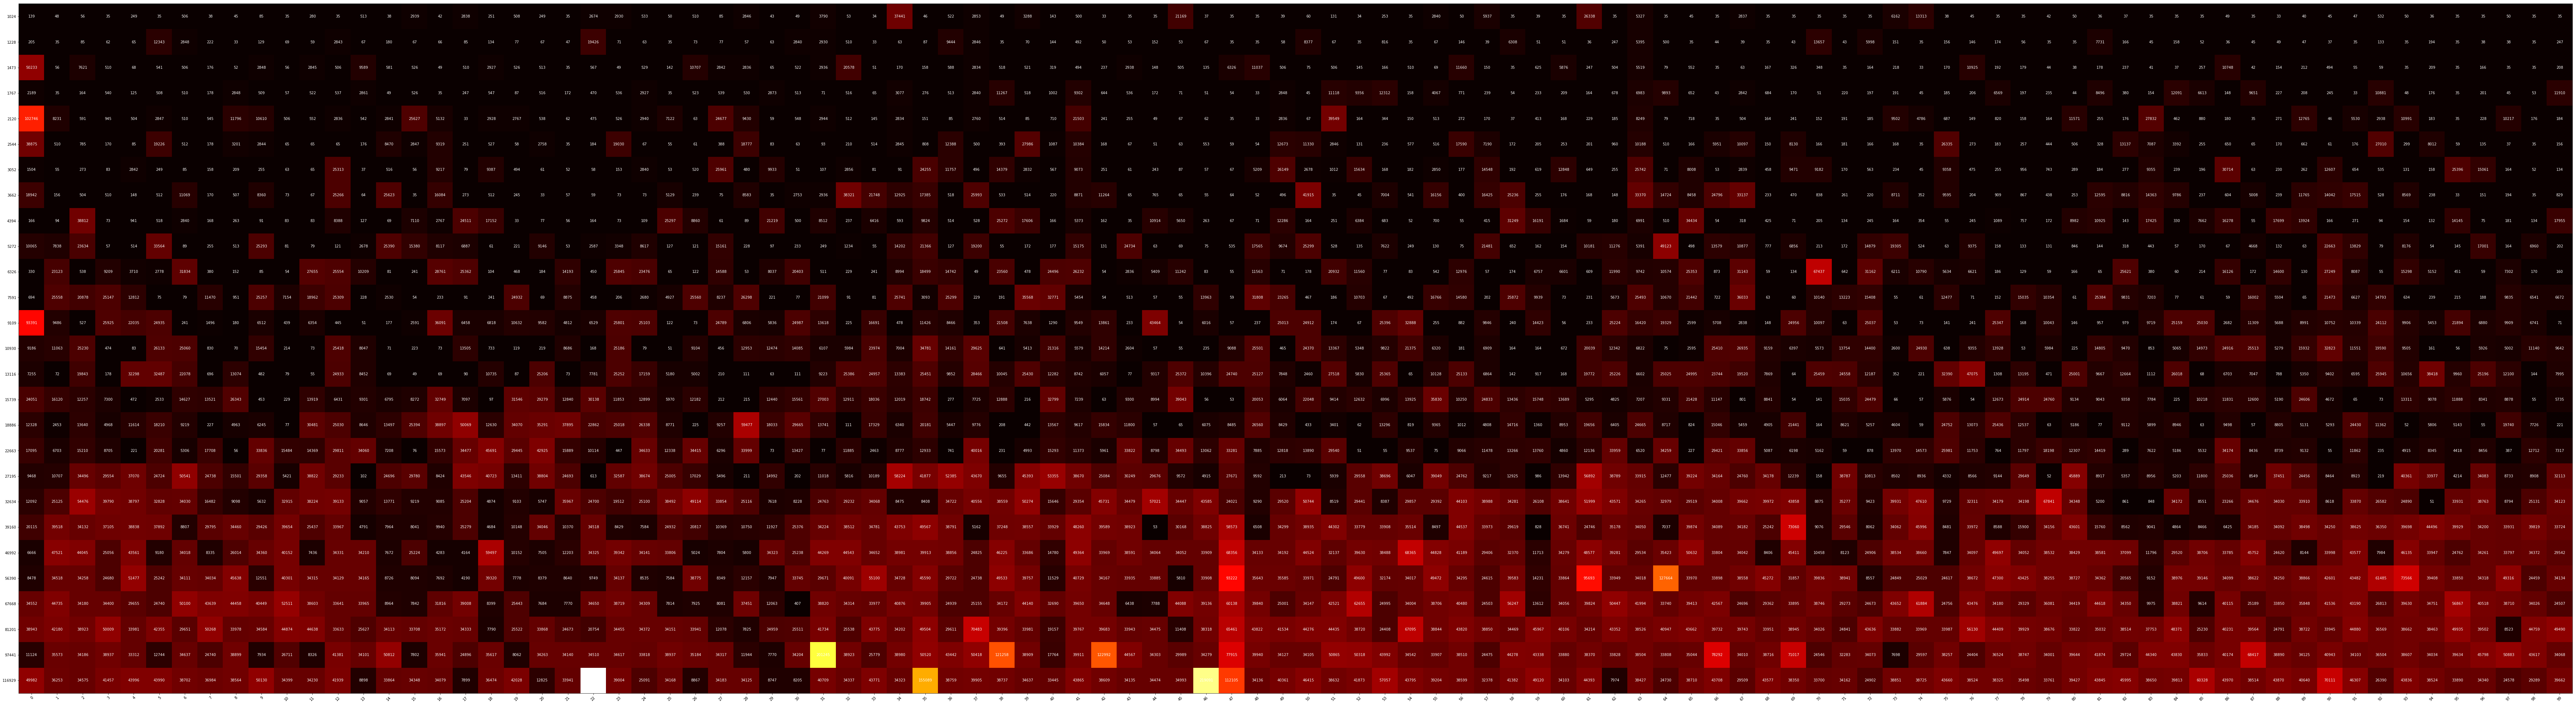

In [10]:
# for the first half of data points to analyze small size caches 
plot_heatmap(range(0, iterations), sizes[0:(int) (len(sizes)/2)], np.array(h1_data).T)

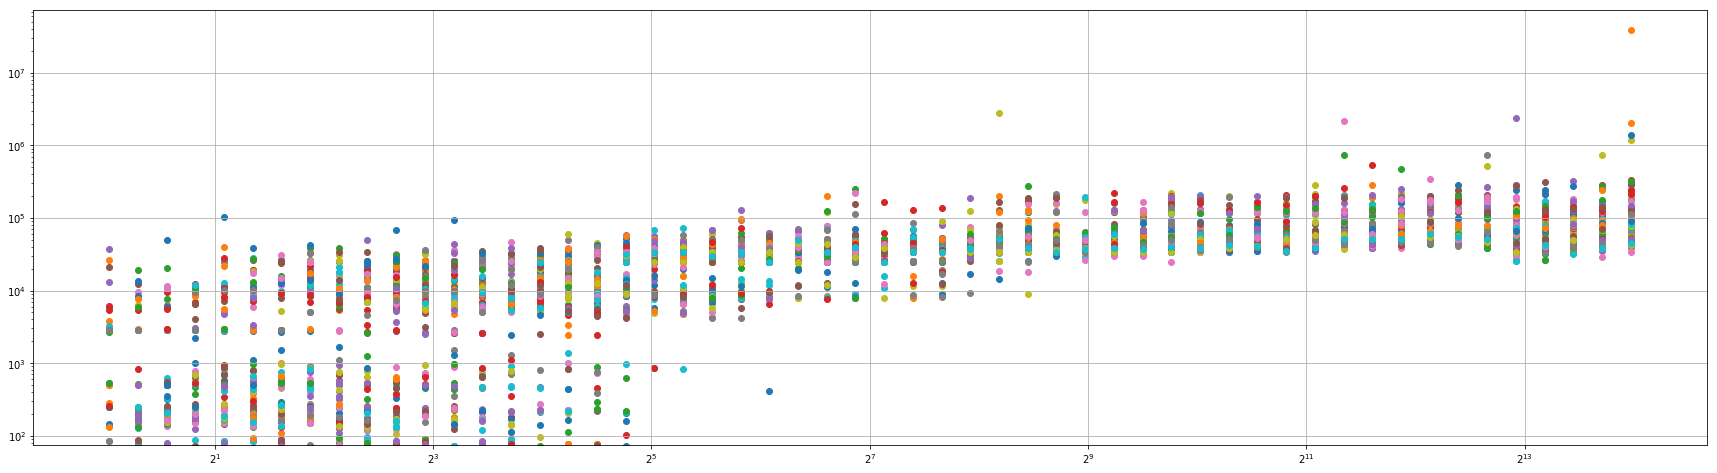

In [24]:
#scatter plot of every iteration (x: sizes, y: time)

fig = plt.figure(figsize=(30, 8))
ax1 = fig.add_subplot(111)
for l in all_data:
  ax1.scatter(sizes/1000,l)
  

start, end = ax1.get_xlim()
ax1.xaxis.set_ticks(np.arange(0, end, 200))
start, end = ax1.get_ylim()
ax1.yaxis.set_ticks(np.arange(0, end, 10**6))

ax1.set_yscale('log')
ax1.set_xscale('log', basex = 2)
plt.grid()
plt.show()

Compute the statistics of input data and plot mean and median

In [25]:
 #computes the median and mean of iterations
from statistics import mean, median
import collections
import csv

means = {}
medians = {}

grouped = df.groupby(df[0])

for cache_size in sizes:
  times = grouped.get_group(cache_size)
  means[cache_size/1000] = mean(times[1])
  medians[cache_size/1000] = median(times[1])

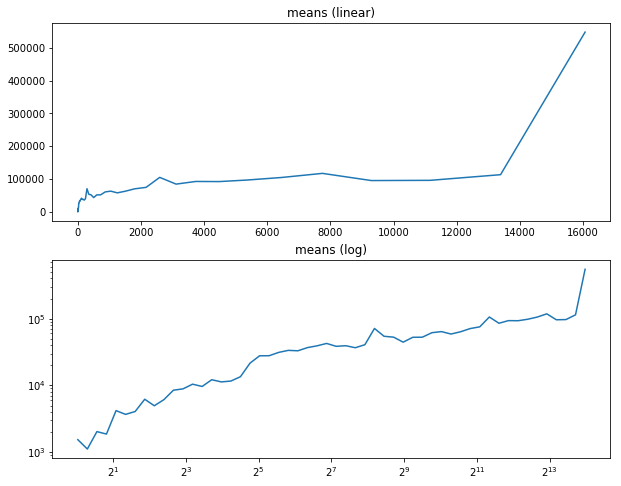

In [27]:
# plot the mean of all iterations
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')

x = list(means.keys())
y = list(means.values())

plt.subplot(211)
plt.plot(x,y)
plt.yscale('linear')
plt.title('means (linear)')


plt.subplot(212)
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log', basex = 2)
plt.title('means (log)')

plt.show()

Text(0.5, 1.0, 'medians (log)')

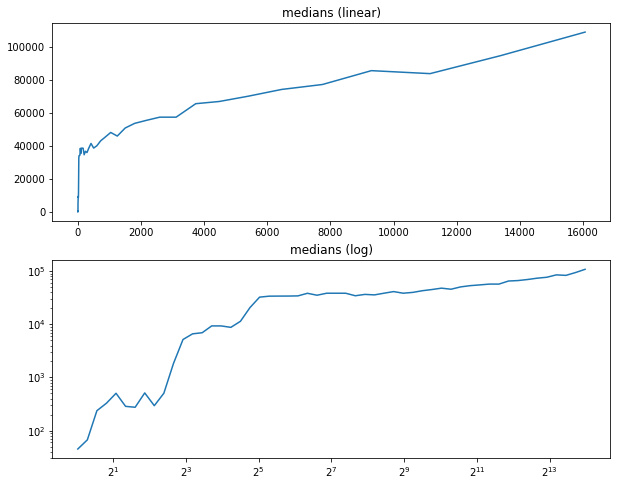

In [28]:
#plot the median of all iterations
figure(num=None, figsize=(10, 8), dpi=80, facecolor='w', edgecolor='k')
x = list(medians.keys())
y = list(medians.values())

plt.subplot(211)
plt.plot(x,y)
plt.yscale('linear')
plt.title('medians (linear)')

plt.subplot(212)
plt.plot(x,y)
plt.yscale('log')
plt.xscale('log', basex =2)
plt.title('medians (log)')